# 📘 Seaborn for Machine Learning: Lecture Notes

- Seaborn is a Python data visualization library built on top of Matplotlib. 
- It provides a high-level interface for drawing attractive and informative statistical graphics.

<b>Why Use Seaborn in Machine Learning?<b>
- To explore datasets visually.
- To understand relationships between variables (e.g., correlation).
- To detect patterns, trends, and outliers.
- To visualize model performance using confusion matrix, regression plots, etc.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<b>Histogram<b>

A histogram is a type of bar plot that represents the distribution of a numerical (continuous) variable by dividing the entire range of values into intervals (called bins) and counting how many values fall into each bin.

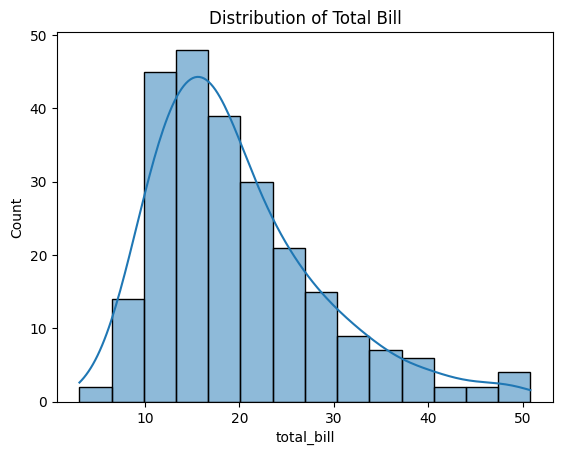

In [6]:
sns.histplot(data=tips, x='total_bill', kde=True)
plt.title("Distribution of Total Bill")
plt.show()

<b>KDE<b>

- KDE (Kernel Density Estimation) is a smoothed version of a histogram.
- It estimates the probability density function (PDF) of a continuous variable.
- The curve helps to see the shape (like peaks and spread) of the distribution more clearly than the bars.

<b>Box Plot <b>

A box plot (also known as a box-and-whisker plot) is a statistical plot that shows the distribution of a dataset based on five summary statistics:
- Minimum (lowest value)
- 1st Quartile (Q1) – 25% of data falls below this
- Median (Q2) – 50% of data falls below this
- 3rd Quartile (Q3) – 75% of data falls below this
- Maximum (highest value)

It may also highlight:
-Outliers (points that fall far from the rest of the data)

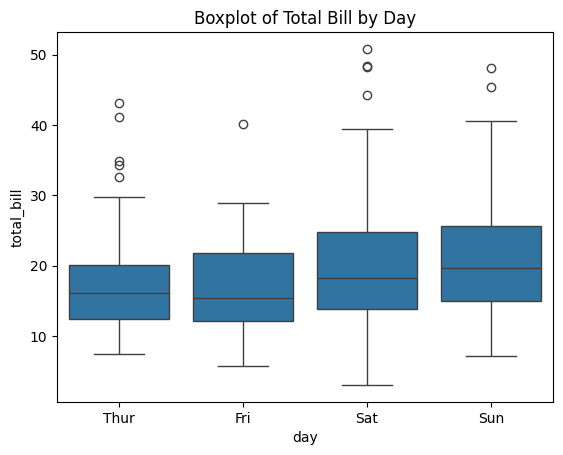

In [7]:
sns.boxplot(x='day', y='total_bill', data=tips)
plt.title("Boxplot of Total Bill by Day")
plt.show()

<b>Violin Plot<b>

- A violin plot is a data visualization that combines features of both a box plot and a KDE (Kernel Density Estimate) plot. 
- It shows the distribution of the data, along with summary statistics like median and quartiles.

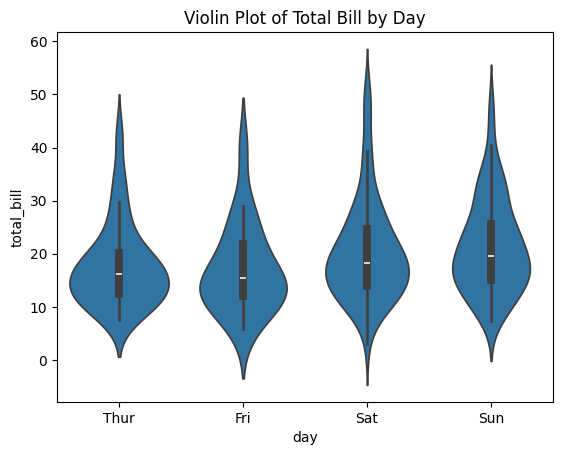

In [8]:
sns.violinplot(x='day', y='total_bill', data=tips)
plt.title("Violin Plot of Total Bill by Day")
plt.show()

<b>What Does a Violin Plot Show?<b>

-  density curve (like a mirror image) showing the distribution of the data.
- Thicker parts of the violin = more data points in that range.
- Includes a box plot inside to show:
    - Median (line in the center)
    - Quartiles (box edges)
    - Sometimes individual points

<b>Scatter Plot<b>

A scatter plot is a type of plot that shows the relationship between two numerical variables using dots (points).

<b>Key Features<b>
    
- X-axis and Y-axis represent two continuous variables.
- Each dot represents one data point.
- Useful for identifying:
    - Trends
    - Correlations
    - Clusters
    - Outliers

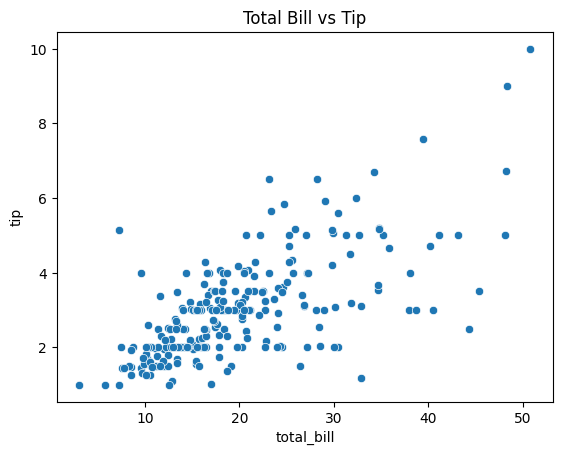

In [9]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Total Bill vs Tip")
plt.show()

<b>Pair Plot<b>

A pair plot (also called a scatterplot matrix) is a grid of plots that shows pairwise relationships between multiple numerical variables in a dataset.

- Pair Plot creates a scatter plot for every possible pair of features.
- Diagonal plots typically show histograms or KDE plots of each variable.
- Optionally uses hue to color by a categorical variable (e.g., species, gender, etc.).

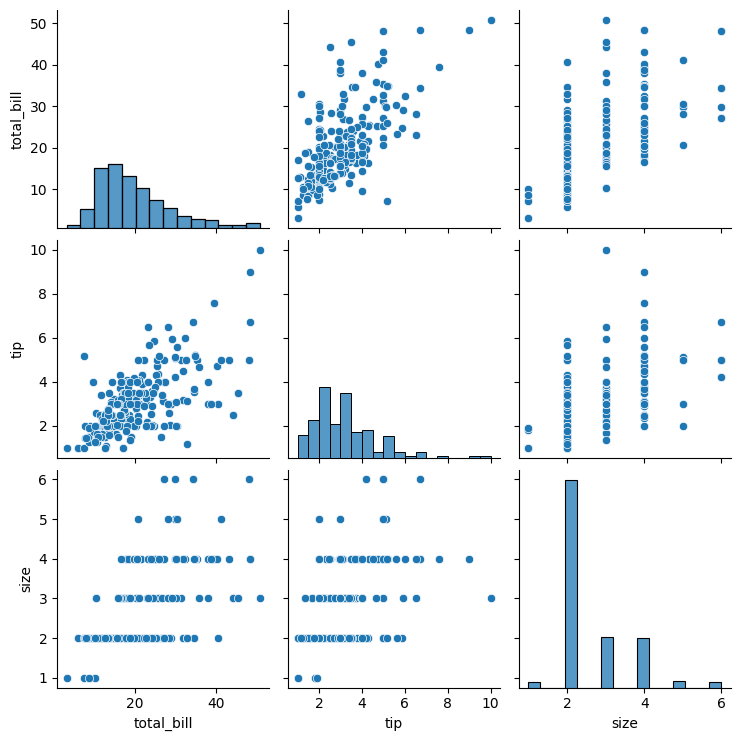

In [10]:
sns.pairplot(tips)
plt.show()

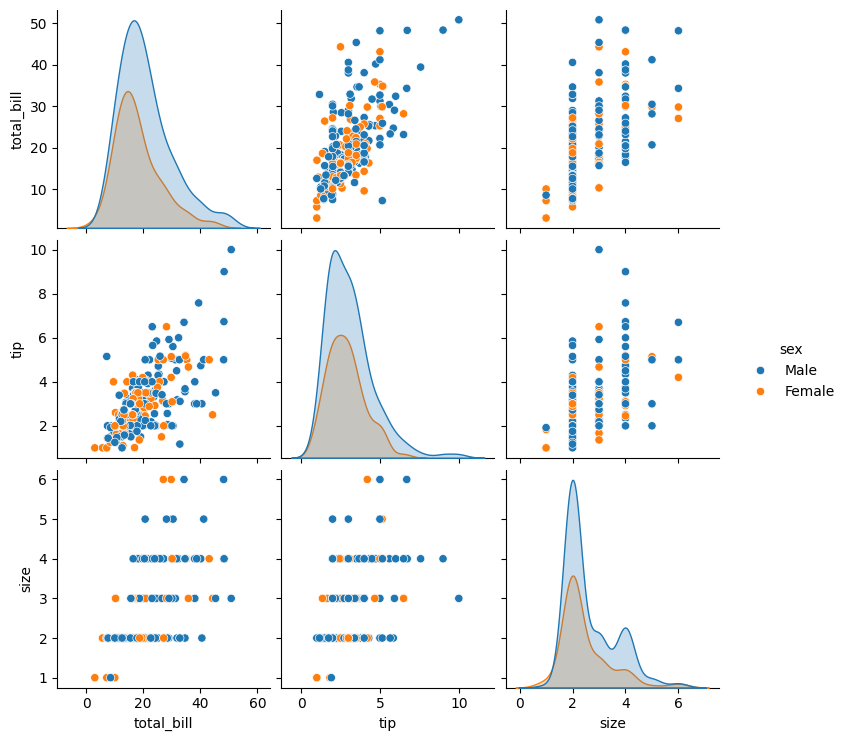

In [11]:
sns.pairplot(tips, hue='sex')
plt.show()

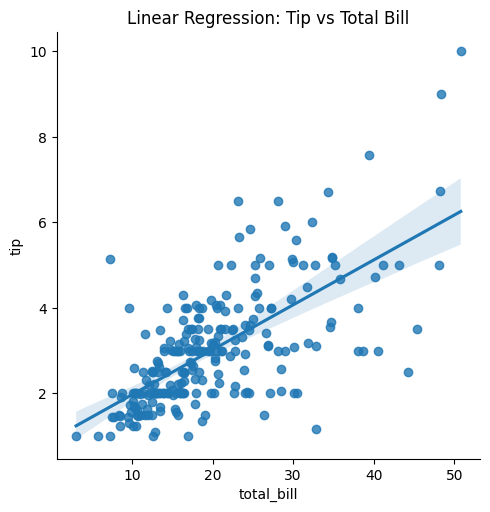

In [12]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.title("Linear Regression: Tip vs Total Bill")
plt.show()

<b>Heatmap<b>

A heatmap is a 2D data visualization where values are represented by color intensity. It helps to visually understand patterns, correlations, or frequencies in a matrix or table format.

<b>What Does a Heatmap Show?<b>

- Color represents magnitude: darker or brighter shades indicate higher or lower values.
- Often used to show:
    - Correlations between features
    - Confusion matrices in classification
    - Missing data patterns
    - Frequency counts in cross-tabulations

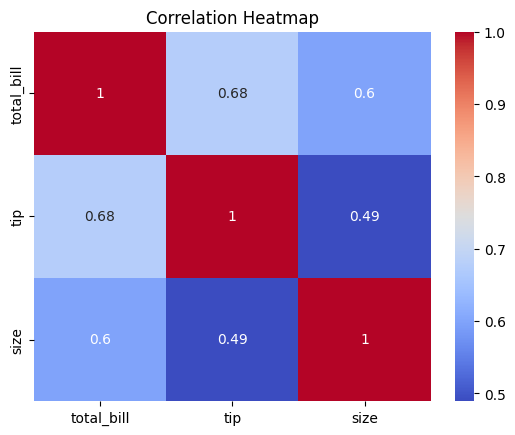

In [13]:
correlation = tips.select_dtypes(include='number').corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

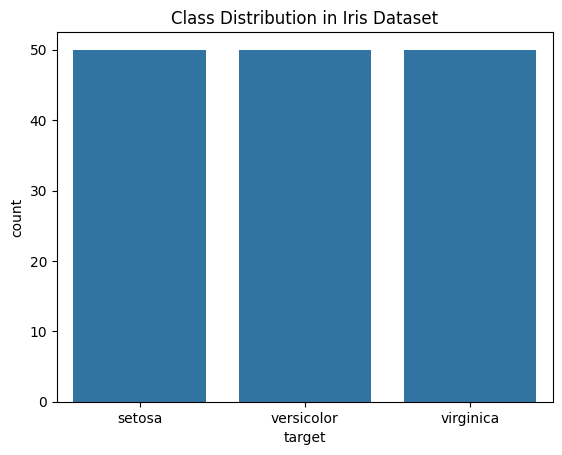

In [14]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

sns.countplot(x='target', data=df)
plt.title("Class Distribution in Iris Dataset")
plt.show()

In [15]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

## 🌺 More Seaborn Visualizations on the Iris Dataset

In [16]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)
df = iris.frame
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

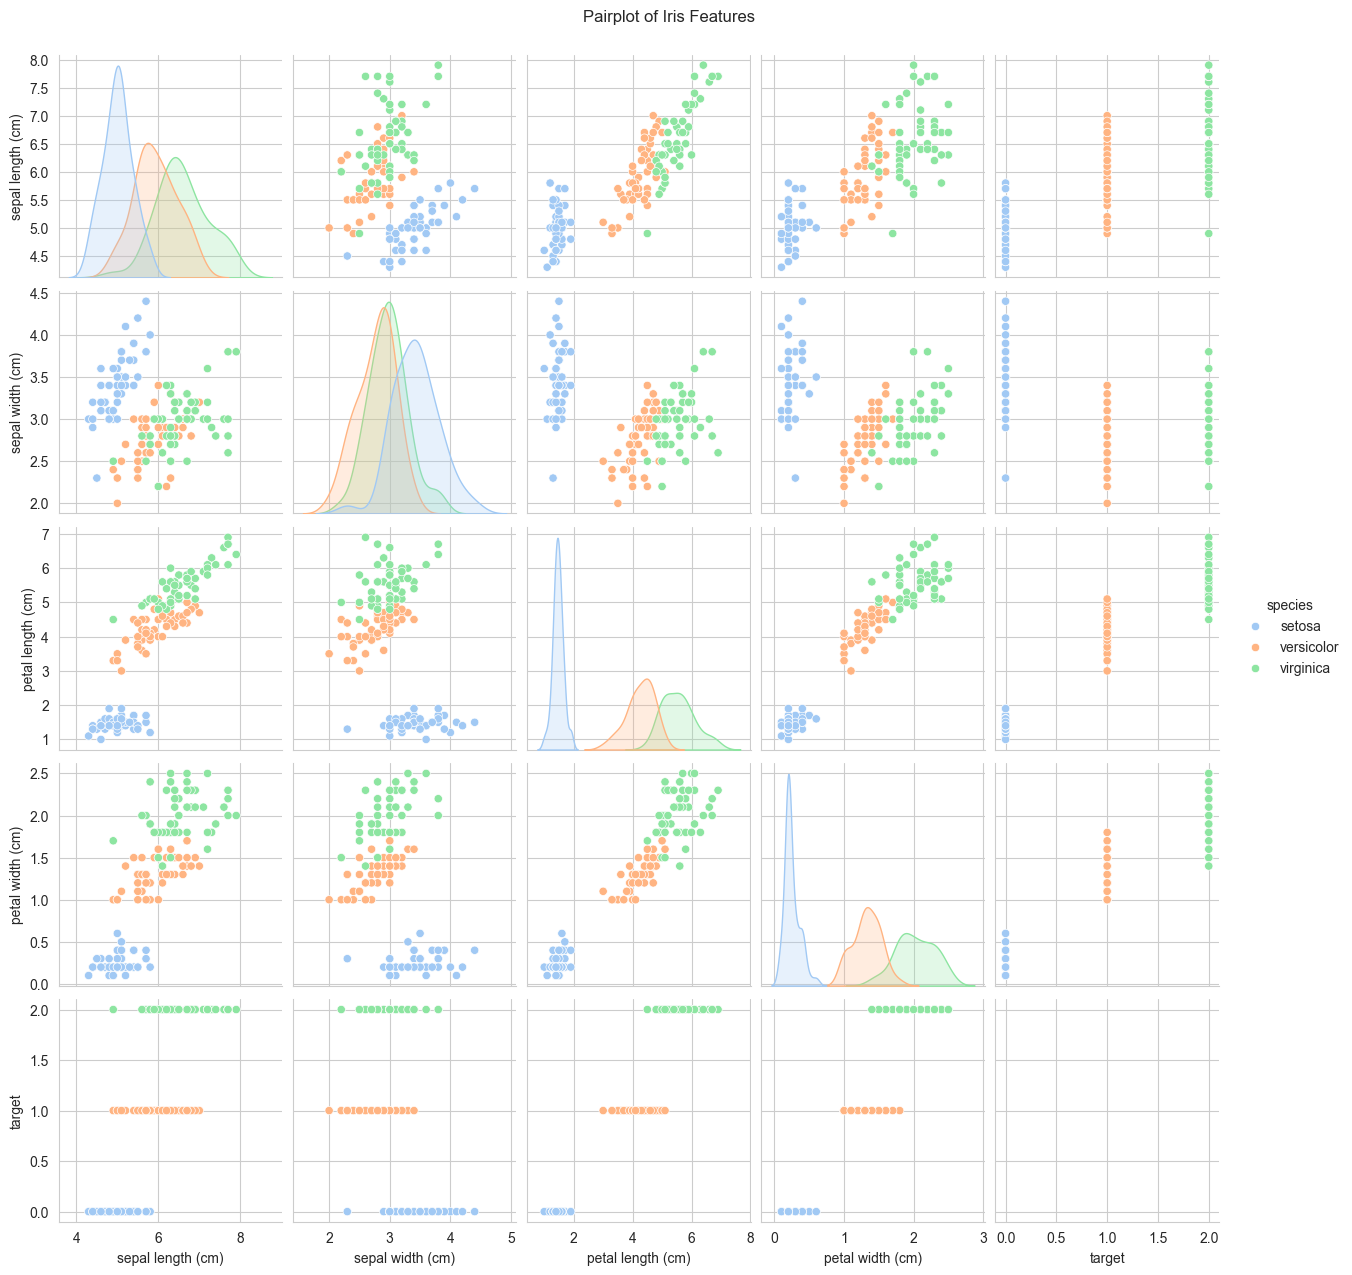

In [17]:
# Pairplot
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

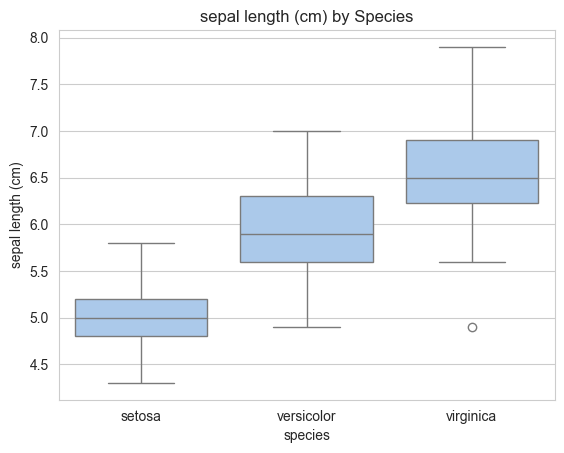

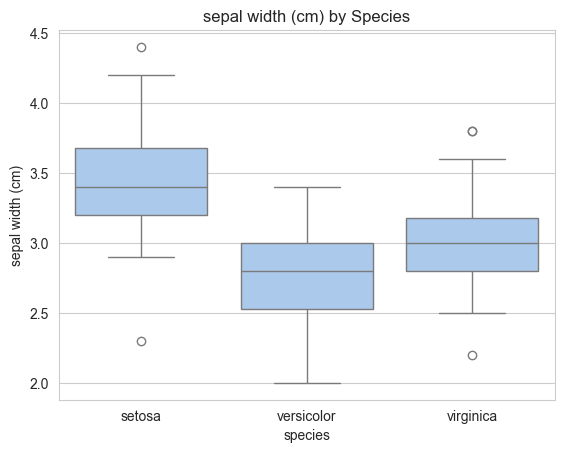

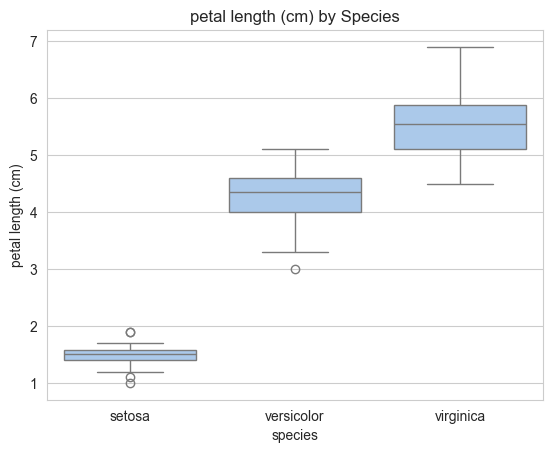

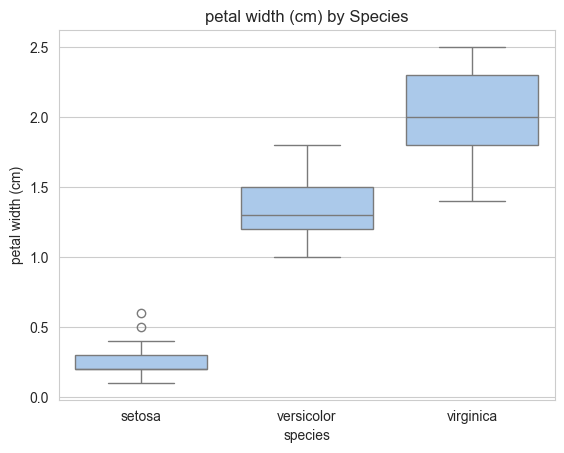

In [18]:
# Boxplots for each feature
for col in iris.feature_names:
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f"{col} by Species")
    plt.show()

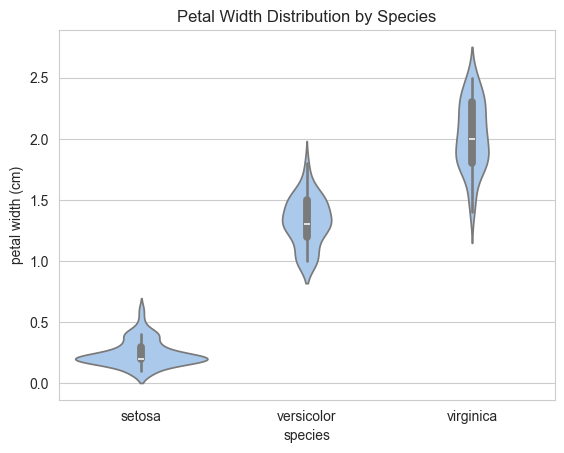

In [19]:
# Violin Plot
sns.violinplot(x='species', y='petal width (cm)', data=df)
plt.title("Petal Width Distribution by Species")
plt.show()

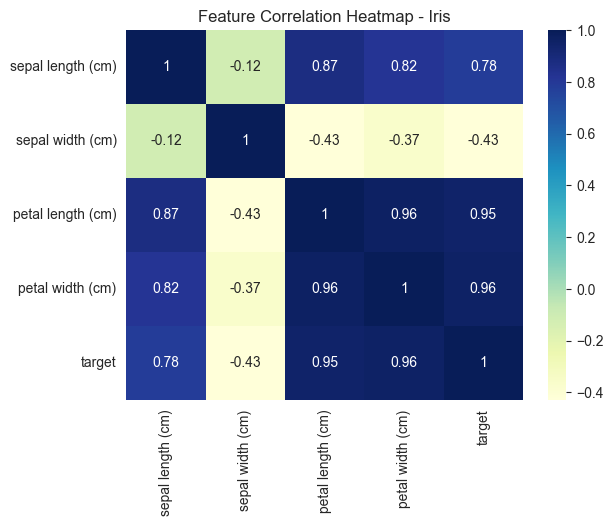

In [20]:
# Correlation Heatmap
sns.heatmap(df.drop(columns='species').corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap - Iris")
plt.show()

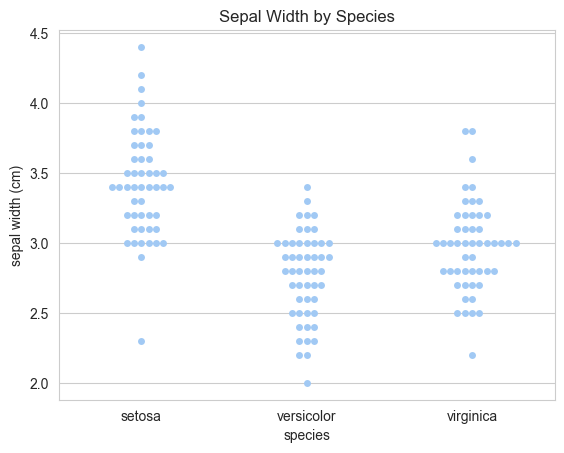

In [19]:
# Swarm Plot
sns.swarmplot(x='species', y='sepal width (cm)', data=df)
plt.title("Sepal Width by Species")
plt.show()

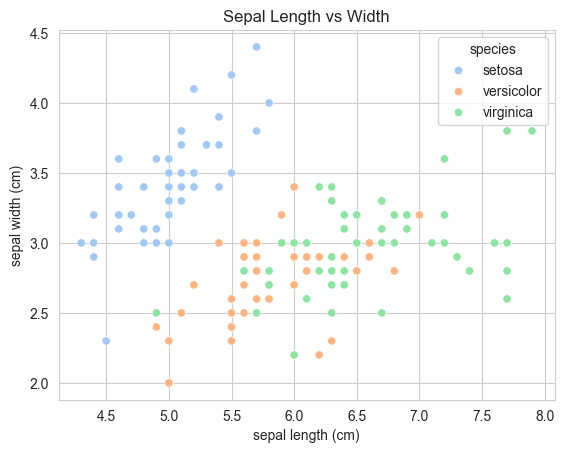

In [21]:
# Scatter Plot
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)
plt.title("Sepal Length vs Width")
plt.show()

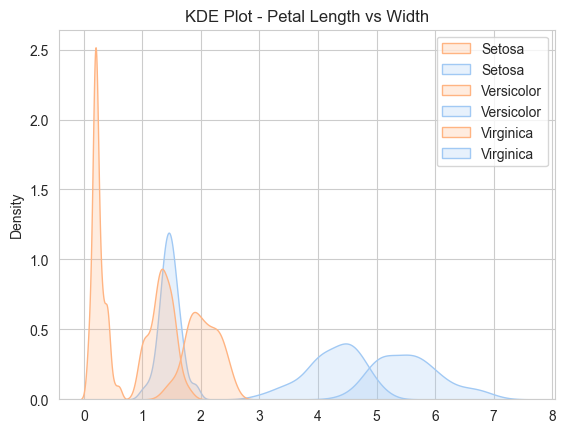

In [21]:
# KDE Plot
sns.kdeplot(data=df[df['species'] == 'setosa'][['petal length (cm)', 'petal width (cm)']], fill=True, label='Setosa')
sns.kdeplot(data=df[df['species'] == 'versicolor'][['petal length (cm)', 'petal width (cm)']], fill=True, label='Versicolor')
sns.kdeplot(data=df[df['species'] == 'virginica'][['petal length (cm)', 'petal width (cm)']], fill=True, label='Virginica')
plt.title("KDE Plot - Petal Length vs Width")
plt.legend()
plt.show()